#### Stuart Kirwan


# Part 1: Elastic Product (Furniture)

In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import gurobipy as gp 
from gurobipy import GRB

In [2]:
# loading data
ds = pd.read_csv('retail_price.csv')

# selecting only furniture2 productid
furn_ds = ds[ds['product_id'] == 'furniture2']
furn_ds.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
494,furniture2,furniture_decor,01-07-2017,5,375.0,15.856000,75.0,44,903,6,...,75.0,4.1,15.856000,38.400000,3.7,7.780000,75.0,4.1,15.856000,74.95
495,furniture2,furniture_decor,01-08-2017,13,975.0,15.376923,75.0,44,903,6,...,75.0,4.1,15.376923,38.400000,3.7,12.105000,75.0,4.1,15.376923,75.00
496,furniture2,furniture_decor,01-10-2017,5,375.0,13.640000,75.0,44,903,6,...,75.0,4.1,13.640000,38.400000,3.7,13.980000,75.0,4.1,13.640000,74.95
497,furniture2,furniture_decor,01-11-2017,44,3300.0,16.132727,75.0,44,903,6,...,75.0,4.1,16.132727,36.854286,3.7,13.652143,99.9,4.4,21.190000,75.00
498,furniture2,furniture_decor,01-12-2017,47,3525.0,17.446383,75.0,44,903,6,...,75.0,4.1,17.446383,75.000000,4.1,17.446383,99.9,4.4,20.646667,75.00


In [3]:
# Estimating product cost (choosing 100% markup up)
# Online research shows the typical markup can range from 50% to 400%

max_price = max(furn_ds['unit_price'])
est_cost = (max_price/2)
print('Estimated Cost per Item:')
print(est_cost)

Estimated Cost per Item:
51.61666665


Text(0.5, 1.0, 'Quantity Sold vs Unit Price')

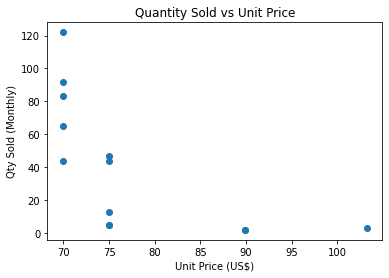

In [4]:
plt.scatter(furn_ds['unit_price'], furn_ds['qty'])
plt.xlabel('Unit Price (US$)')
plt.ylabel('Qty Sold (Monthly)')
plt.title('Quantity Sold vs Unit Price')

In [5]:
# Creating datasets
X = furn_ds[['unit_price']]
y = furn_ds['qty']

# Creating linear regression to model price
model = LinearRegression()
model.fit(X,y)

# Regression Output
print('Model coefficients: ', model.coef_)
print('Model intercept: ', model.intercept_)
print('R-squared: ', model.score(X, y))

Model coefficients:  [-2.51284805]
Model intercept:  235.30905533492975
R-squared:  0.4190039602670904


#### Demand Equation:

*Qty* = 235.309 + (-2.513)**Unit_Price*

#### Calculating Quadratic Equation for Estimated Profit:
*Profit* = (*Unit_price* - *Estimated_Cost*) * (*Qty*) 

*Profit* = (*Unit_price* - 51.617) * (235.309 + (-2.513)\**Unit_Price*)

*Profit* = (235.309\**Unit_price*) + ((-2.513)\**Unit_Price*^2) + (-12145.945) + (129.714\**Unit_Price*)

#### Final Quadratic Equation for Estimated Profit:

*Profit* = ((-2.513)\**Unit_Price*^2) + (365.023\**Unit_price*) + (-12145.945)

Text(0.5, 1.0, 'Quadratic Equation Estimating Monthly Profit')

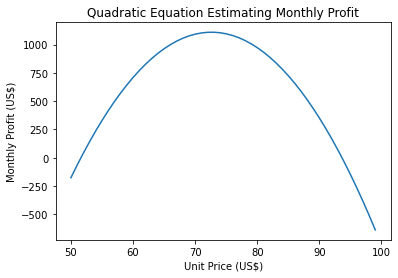

In [6]:
# plotting quadratic equation

def quadratic(a, b, c, x):
    y = a*x**2 + b*x + c
    return y

# Create x values from 0 to 150
x = range(50, 100)

# Evaluate Final Quadratic Equation for each value of x
y = [quadratic(-2.513, 365.023, -12145.945, i) for i in x]

# Plot the points
plt.plot(x, y)
plt.xlabel('Unit Price (US$)')
plt.ylabel('Monthly Profit (US$)')
plt.title('Quadratic Equation Estimating Monthly Profit')

In [7]:
# Creating gurobi optimization model
quad_model_1 = gp.Model("quadratic")

# Decision Variable
x = quad_model_1.addVar(lb=0, ub=GRB.INFINITY, name="x")

# Objective function
quad_model_1.setObjective(-2.513 * x ** 2 + 365.023 * x - 12145.945, GRB.MAXIMIZE)

# Optimize
quad_model_1.optimize()

print("\n")
print("Optimal Unit Price: $" + str(round(x.x,2)))
print("Resulting in $" + str(round(quad_model_1.objVal,2)) + " monthly profit")

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-4258U CPU @ 2.40GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0x2e49c814
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [4e+02, 4e+02]
  QObjective range [5e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.13s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.15 seconds (0.00 work units)
Optimal objective 1.10930674e+03


Optimal Unit Price: $72.63
Resulting in $1109.31 monthly profit


# Part 2: Inelastic Product (Natural Gas)

In [8]:
# importing data

# Gas consumption Data
gas_cons_ds = pd.read_csv('gas_cons.csv')

# Gas Price Data
gas_price_ds = pd.read_csv('gas_price.csv')

# CPI Data
cpi_ds = pd.read_csv('cpi.csv')

In [9]:
# Data Wrangling Gas Price Data

# Finding average natural gas price by year for USA
year_price = pd.DataFrame(gas_price_ds.groupby(gas_price_ds['year'])['price'].mean()).reset_index()

# Obtaining List of years with available data
years = list(year_price['year'])

In [10]:
# Data Wrangling Gas consumption data

# Filtering for USA, subset of years (with available prce data)
gas_cons2 = gas_cons_ds[gas_cons_ds['Code'] == 'USA']
gas_cons3 = gas_cons2[gas_cons2['Year'].isin(years)]\
.rename(columns={'Year':'year','Gas Consumption - TWh': 'consumption'}).reset_index()\
.drop(columns=['index','Entity','Code'])

In [11]:
# Data Wrangling CPI data

# Finding average CPI value for year
cpi_ds2 = pd.DataFrame(cpi_ds.groupby(cpi_ds['year'])['cpi'].mean()).reset_index()

In [12]:
# merging datasets
merged_df = pd.merge(year_price, gas_cons3, on='year', how='inner')
merged_df2 = pd.merge(merged_df, cpi_ds2, on='year', how='inner')

# adjusting natural gas price for inflation
merged_df2['inflation_factor'] = merged_df2['cpi'] / merged_df2.loc[merged_df2['year'] == 1997, 'cpi'].iloc[0]
merged_df2['adj_price'] = merged_df2['price'] / merged_df2['inflation_factor']

# Subsetting data for years before and after 2010
gas_b_2010 = merged_df2[merged_df2['year'] <= 2010].reset_index()
gas_a_2010 = merged_df2[merged_df2['year'] > 2010].reset_index()

print('Dataset for years 1997-2010:')
print(gas_b_2010.head())
print('\n')
print('Dataset for years 2011-2021:')
print(gas_a_2010.head())

Dataset for years 1997-2010:
   index  year     price  consumption         cpi  inflation_factor  adj_price
0      0  1997  2.496667    6125.3154  111.516667          1.000000   2.496667
1      1  1998  2.090833    6021.7910  102.875000          0.922508   2.266467
2      2  1999  2.270000    6042.6284  106.616667          0.956060   2.374327
3      3  2000  4.309167    6283.9067  124.608333          1.117397   3.856435
4      4  2001  3.956667    6006.5800  129.291667          1.159393   3.412705


Dataset for years 2011-2021:
   index  year     price  consumption         cpi  inflation_factor  adj_price
0     14  2011  4.000000    6582.1080  243.909083          2.187198   1.828824
1     15  2012  2.752500    6881.2275  246.080417          2.206669   1.247355
2     16  2013  3.728333    7070.2285  244.409500          2.191686   1.701126
3     17  2014  4.391667    7222.6045  243.583417          2.184278   2.010580
4     18  2015  2.630000    7435.7950  202.895000          1.819414   1

In [13]:
# Difficult to find production cost or markup data. Estimating a 200% markup
# 1997 - 2010
max_price_b = max(gas_b_2010['adj_price'])
est_cost_b = (max_price_b/3)

print('Estimated Cost for years 1997-2010:')
print(est_cost_b)
print('\n')

# Difficult to find production cost or markup data. Estimating a 200% markup
# 2011 - 2021
max_price_a = max(gas_a_2010['adj_price'])
est_cost_a = (max_price_a/3)

print('Estimated Cost for years 2011-2021:')
print(est_cost_a)

Estimated Cost for years 1997-2010:
1.8500380202286444


Estimated Cost for years 2011-2021:
0.6701934454046067


## Price Optimization for Natural Gas (1997-2010)

Text(0.5, 1.0, 'Natural Gas Consumption vs Price in US (1997-2010)')

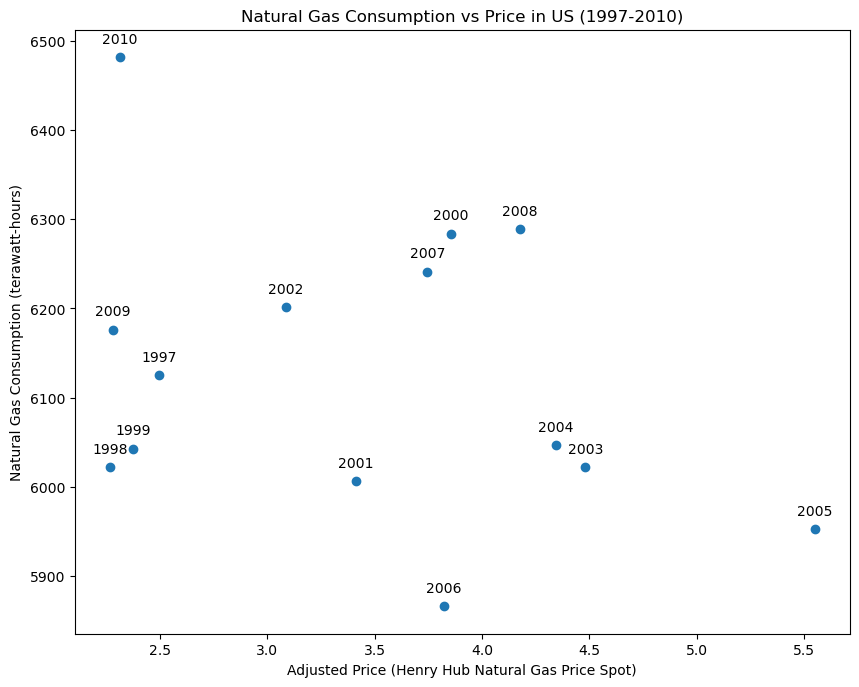

In [14]:
# Plotting Data for years 1997-2010
labels = gas_b_2010['year']

fig = plt.figure(figsize=(10, 8), dpi=100)

plt.scatter(gas_b_2010['adj_price'], gas_b_2010['consumption'])

# Add labels to the plot
for i, label in enumerate(labels):
    plt.annotate(label, xy=(gas_b_2010['adj_price'][i], \
                            gas_b_2010['consumption'][i]), textcoords='offset points', xytext=(0,10), ha='center')

plt.xlabel('Adjusted Price (Henry Hub Natural Gas Price Spot)')
plt.ylabel('Natural Gas Consumption (terawatt-hours)')
plt.title('Natural Gas Consumption vs Price in US (1997-2010)')

In [15]:
# Linear Regression for years 1997-2010

# Creating datasets
X_gas = gas_b_2010[['adj_price']]
y_gas = gas_b_2010['consumption']

# Creating linear regression to model price
model_gas = LinearRegression()
model_gas.fit(X_gas,y_gas)

# Regression Output
print('Model coefficients: ', model_gas.coef_)
print('Model intercept: ', model_gas.intercept_)
print('R-squared: ', model_gas.score(X_gas, y_gas))

Model coefficients:  [-51.8089732]
Model intercept:  6303.801221748019
R-squared:  0.10411009624276835


#### Demand Equation:
*Consumption* = 6303.801 + (-51.809)\**Price*

#### Calculating Quadratic Equation for Estimated Profit:
*Profit* = (*Price* - *Estimated_Cost*) * (*Consumption*) 

*Profit* = (*Price* - 1.85) * (6303.801 + (-51.809)\**Price*)

#### Final Quadratic Equation for Estimated Profit:

*Profit* = -51.809\**Price*^2+6399.647\**Price*-11662.032


Text(0.5, 1.0, 'Quadratic Equation Estimating Profit per Btu')

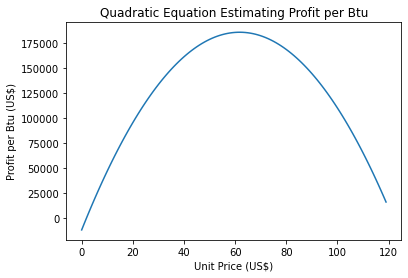

In [16]:
# Create x values from 0 to 120
x = range(0, 120)

# Evaluate Final Quadratic Equation for each value of x
y = [quadratic(-51.809, 6399.647, -11662.032, i) for i in x]

# Plot the points
plt.plot(x, y)
plt.xlabel('Unit Price (US$)')
plt.ylabel('Profit per Btu (US$)')
plt.title('Quadratic Equation Estimating Profit per Btu')

In [17]:
# Creating gurobi optimization model
quad_model_2 = gp.Model("quadratic")

# Decision Variable
x2 = quad_model_2.addVar(lb=0, ub=GRB.INFINITY, name="x")

# Objective function
quad_model_2.setObjective(-51.809 * x2 ** 2 + 6399.647 * x2 - 11662.032, GRB.MAXIMIZE)

# Optimize
quad_model_2.optimize()

print("\n")
print("Optimal Price: $" + str(round(x2.x,2)))
print("Resulting in $" + str(round(quad_model_2.objVal,2)) + " profit")

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-4258U CPU @ 2.40GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0xc6104652
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [6e+03, 6e+03]
  QObjective range [1e+02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.10s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.13 seconds (0.00 work units)
Optimal objective 1.85965223e+05


Optimal Price: $61.76
Resulting in $185965.22 profit


## Price Optimization for Natural Gas (2011-2021)

Text(0.5, 1.0, 'Natural Gas Consumption vs Price in US (2011-2021)')

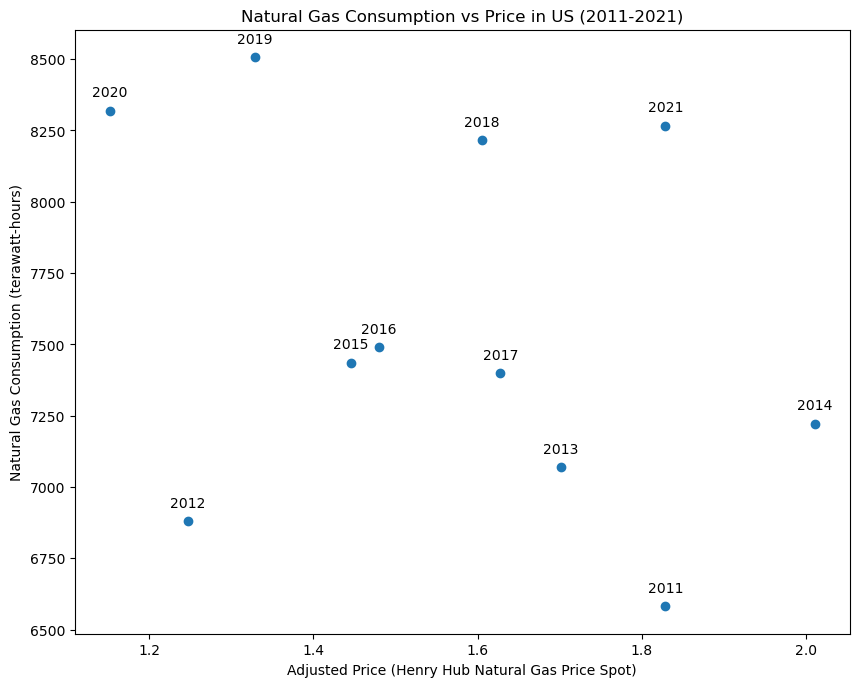

In [18]:
# Plotting Data 2011-2021
labels = gas_a_2010['year']

fig = plt.figure(figsize=(10, 8), dpi=100)

plt.scatter(gas_a_2010['adj_price'], gas_a_2010['consumption'])

# Add labels to the plot
for i, label in enumerate(labels):
    plt.annotate(label, xy=(gas_a_2010['adj_price'][i], \
                            gas_a_2010['consumption'][i]), textcoords='offset points', xytext=(0,10), ha='center')

plt.xlabel('Adjusted Price (Henry Hub Natural Gas Price Spot)')
plt.ylabel('Natural Gas Consumption (terawatt-hours)')
plt.title('Natural Gas Consumption vs Price in US (2011-2021)')

In [19]:
# Linear Regression for years 2011-2021

# Creating datasets
X_gas = gas_a_2010[['adj_price']]
y_gas = gas_a_2010['consumption']

# Creating linear regression to model price
model_gas = LinearRegression()
model_gas.fit(X_gas,y_gas)

# Regression Output
print('Model coefficients: ', model_gas.coef_)
print('Model intercept: ', model_gas.intercept_)
print('R-squared: ', model_gas.score(X_gas, y_gas))

Model coefficients:  [-807.01536813]
Model intercept:  8847.234730897131
R-squared:  0.1096982700218535


#### Demand Equation:
*Consumption* = 8847.234 + (-807.015)\**Price*

#### Calculating Quadratic Equation for Estimated Profit:
*Profit* = (*Price* - *Estimated_Cost*) * (*Consumption*) 

*Profit* = (*Price* - 0.670) * (8847.234 + (-807.015)\**Price*)

#### Final Quadratic Equation for Estimated Profit:

*Profit* = -807.015\**Price*^2 + 9387.934\**Price* - 5927.647

Text(0.5, 1.0, 'Quadratic Equation Estimating Profit per Btu')

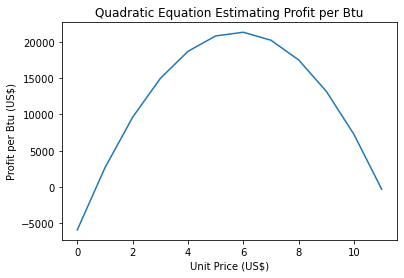

In [20]:
# Create x values from 0 to 12
x = range(0, 12)

# Evaluate Final Quadratic Equation for each value of x
y = [quadratic(-807.015, 9387.934, -5927.647, i) for i in x]

# Plot the points
plt.plot(x, y)
plt.xlabel('Unit Price (US$)')
plt.ylabel('Profit per Btu (US$)')
plt.title('Quadratic Equation Estimating Profit per Btu')

In [21]:
# Creating gurobi optimization model
quad_model_3 = gp.Model("quadratic")

# Decision Variable
x3 = quad_model_3.addVar(lb=0, ub=GRB.INFINITY, name="x3")

# Objective function
quad_model_3.setObjective(-807.015 * x3 ** 2 + 9387.934 * x3 - 5927.647, GRB.MAXIMIZE)

# Optimize
quad_model_3.optimize()

#print(x3)

print("\n")
print("Optimal Price: $" + str(round(x3.x,2)))
print("Resulting in $" + str(round(quad_model_3.objVal,2)) + " profit")

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-4258U CPU @ 2.40GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0xe319c954
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [9e+03, 9e+03]
  QObjective range [2e+03, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.10s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.12 seconds (0.00 work units)
Optimal objective 2.13746041e+04


Optimal Price: $5.82
Resulting in $21374.6 profit
